# Personalización de Campaña de Marketing: Segmentación de Clientes

El objetivo de este análisis es realizar una **segmentación de clientes** para personalizar una campaña de e-mail dirigida a **10,000 clientes**. Utilizaremos el algoritmo **K-Nearest Neighbors (KNN)** para agrupar a los clientes en **4 o 5 segmentos**, basándonos en características demográficas clave y en su **probabilidad de compra**.

## Contexto

Siguiendo la sugerencia del equipo de marketing, liderado por **Erin**, se acordó que la segmentación se basaría en datos demográficos como:

- **Edad**
- **Sexo**
- **Ingresos**

Este enfoque permitirá crear perfiles específicos que servirán para personalizar las creatividades y mensajes de la campaña de e-mail, mejorando la efectividad de la comunicación y maximizando las tasas de conversión.

## Objetivo

Crear segmentos de clientes bien definidos, de modo que las **4 o 5 creatividades** de la campaña se alineen con los perfiles identificados. Esto permitirá que la campaña sea más relevante y efectiva para cada grupo, lo que podría aumentar significativamente las probabilidades de éxito de la campaña de venta de **tarjetas de crédito**.



In [1]:
import numpy as np 
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.cluster import KMeans

In [2]:
# Leer dataframe con los datos de los 10000 clientes.

df_seleccionados = pd.read_parquet(r'C:\Users\Usuario\Desktop\Nuclio\TFM_Nuclio\easy_money_project\Tarea_3_Recomendación\top_customers_no_credit_card.parquet')

In [3]:
df_seleccionados

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount,probability
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1200307,2019-05-28,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,5,1,3,1,1,1,1,30,40,60,ES,V,5,May,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1.000
330599,2019-05-28,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,7,1,4,1,2,1,1,40,80,60,ES,H,5,May,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1.000
1136531,2019-05-28,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,5,1,3,1,1,1,1,30,40,60,ES,H,5,May,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1.000
1138692,2019-05-28,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,5,1,3,1,1,1,1,30,40,60,ES,V,5,May,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1.000
1258071,2019-05-28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,60,ES,V,5,May,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108774,2019-05-28,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,4,1,3,1,1,0,0,30,40,0,ES,H,5,May,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0.701
1298291,2019-05-28,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,6,1,5,1,1,0,0,50,40,0,ES,V,5,May,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0.701
1209693,2019-05-28,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,4,1,3,1,1,0,0,30,40,0,ES,H,5,May,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0.701


In [4]:
# Listar las columnas a eliminar
columns_to_drop = [
    'pk_partition',
    'short_term_deposit',
    'loans',
    'mortgage',
    'funds',
    'securities',
    'long_term_deposit',
    'em_account_pp',
    'credit_card',
    'payroll',
    'pension_plan',
    'payroll_account',
    'emc_account',
    'debit_card',
    'em_account_p',
    'em_acount',
    'num_products_contracts',
    'p_cuenta_bancaria',
    'cuentas_sum',
    'p_inversion',
    'inversion_sum',
    'p_financiacion',
    'financiacion_sum',
    'profit_cuentas',
    'profit_inversion',
    'profit_financiacion',
    'country_id',
    'mes_nombre_partition',
    'sale_credit_card',
    'sale_short_term_deposit',
    'sale_loans',
    'sale_mortgage',
    'sale_funds',
    'sale_securities',
    'sale_long_term_deposit',
    'sale_em_account_pp',
    'sale_payroll',
    'sale_pension_plan',
    'sale_payroll_account',
    'sale_emc_account',
    'sale_debit_card',
    'sale_em_account_p',
    'sale_em_acount'
]

# Eliminar las columnas del DataFrame
df_seleccionados.drop(columns=columns_to_drop, axis=1, inplace=True)

In [5]:
df_seleccionados

,gender,mes_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,probability
pk_cid,,,,,,,,,,,
1200307,V,5,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,1.000
330599,H,5,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,1.000
1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,1.000
1138692,V,5,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,1.000
1258071,V,5,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,1.000
...,...,...,...,...,...,...,...,...,...,...,...
1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0.701
1298291,V,5,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0.701
1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0.701


In [6]:
df_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1200307 to 1165902
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   gender                10000 non-null  object        
 1   mes_partition         10000 non-null  int32         
 2   grupo_edad            10000 non-null  object        
 3   median_salary         10000 non-null  float64       
 4   region_code           10000 non-null  object        
 5   entry_date            10000 non-null  datetime64[ns]
 6   entry_channel         10000 non-null  object        
 7   active_customer       10000 non-null  int32         
 8   segment               10000 non-null  category      
 9   categoria_antiguedad  10000 non-null  category      
 10  probability           10000 non-null  float32       
dtypes: category(2), datetime64[ns](1), float32(1), float64(1), int32(2), object(4)
memory usage: 684.1+ KB


In [7]:
df_seleccionados = df_seleccionados.reset_index()
df_seleccionados.rename(columns={'index': 'pk_cid'}, inplace=True)

In [8]:
df_seleccionados.duplicated().sum()

0

In [9]:
df_seleccionados

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,probability
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,1.000
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,1.000
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,1.000
3,1138692,V,5,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,1.000
4,1258071,V,5,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0.701
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0.701
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0.701
9998,1120992,H,5,Adultos,"143,527.110",Madrid,2016-10-15,KAT,0,02 - PARTICULARES,2-3 años,0.701


In [10]:
# sociodemografico
sdg_df_cleaned = pd.read_parquet('https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/sociodemographic_df_adrian.parquet')


In [11]:
sdg_df_cleaned

,pk_cid,pk_partition,country_id,region_code,gender,age,salary,mes_partition,mes_nombre_partition,grupo_edad
0,15891,2018-07-28,ES,Madrid,H,59,"102,377.400",7,July,Adultos mayores
1,15891,2018-08-28,ES,Madrid,H,59,"132,384.450",8,August,Adultos mayores
2,16063,2018-11-28,ES,Madrid,H,62,"102,377.400",11,November,Adultos mayores
3,16063,2018-12-28,ES,Madrid,H,62,"132,384.450",12,December,Adultos mayores
4,16063,2019-01-28,ES,Madrid,H,62,"132,384.450",1,January,Adultos mayores
...,...,...,...,...,...,...,...,...,...,...
5962919,1553685,2019-05-28,ES,Ciudad Real,V,52,"114,633.765",5,May,Adultos
5962920,1553686,2019-05-28,ES,Sevilla,H,30,"85,787.220",5,May,Adultos jóvenes
5962921,1553687,2019-05-28,ES,Madrid,V,21,"143,419.770",5,May,Jóvenes
5962922,1553688,2019-05-28,ES,Cantabria,H,43,"114,633.765",5,May,Adultos


In [12]:
sdg_last = sdg_df_cleaned[sdg_df_cleaned["pk_partition"] == "2019-05-28"]

In [13]:
df_joined = df_seleccionados.merge(sdg_last[['pk_cid', 'age']], on='pk_cid', how='left')


In [14]:
df_joined

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,probability,age
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,1.000,55
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,1.000,60
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,1.000,38
3,1138692,V,5,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,1.000,51
4,1258071,V,5,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,1.000,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0.701,34
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0.701,51
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0.701,30
9998,1120992,H,5,Adultos,"143,527.110",Madrid,2016-10-15,KAT,0,02 - PARTICULARES,2-3 años,0.701,40


Ya tenemos el dataframe con todos los datos de los 10.000 clientes para la segmentacion 

In [15]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pk_cid                10000 non-null  int64         
 1   gender                10000 non-null  object        
 2   mes_partition         10000 non-null  int32         
 3   grupo_edad            10000 non-null  object        
 4   median_salary         10000 non-null  float64       
 5   region_code           10000 non-null  object        
 6   entry_date            10000 non-null  datetime64[ns]
 7   entry_channel         10000 non-null  object        
 8   active_customer       10000 non-null  int32         
 9   segment               10000 non-null  category      
 10  categoria_antiguedad  10000 non-null  category      
 11  probability           10000 non-null  float32       
 12  age                   10000 non-null  int64         
dtypes: category(2), d

In [16]:
# Contar el número de filas duplicadas
num_duplicated = df_joined.duplicated().sum()

# Mostrar el número de filas duplicadas
print(f"Número de filas duplicadas: {num_duplicated}")

Número de filas duplicadas: 0


In [17]:
# Contar el número de filas duplicadas
num_null = df_joined.isna().sum().sum()

# Mostrar el número de filas duplicadas
print(f"Número de valores nulos: {num_null}")

Número de valores nulos: 0


Despues de comprobar que el dataset no tiene ni valores nulos ni duplicados, seleccionaremos las variables que utilizaremos para la segmentacion.

## Limpieza de atributos


Los valores de fechas serán eliminados y la variable de categoría "antigüedad" también será eliminada. Sin embargo, esta variable puede ser interesante, por lo que calcularemos una nueva que represente los meses de antigüedad para poder usarla en la segmentación.

In [18]:
# Fecha fija para la comparación
fecha_referencia = pd.to_datetime('2019-05-28')

# Calcular los meses de antigüedad
df_joined['meses_antiguedad'] = ((fecha_referencia - df_joined['entry_date']).dt.days // 30).astype(int)

In [19]:
df_joined

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,probability,age,meses_antiguedad
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,1.000,55,31
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,1.000,60,30
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,1.000,38,36
3,1138692,V,5,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,1.000,51,35
4,1258071,V,5,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,1.000,53,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0.701,34,42
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0.701,51,21
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0.701,30,31
9998,1120992,H,5,Adultos,"143,527.110",Madrid,2016-10-15,KAT,0,02 - PARTICULARES,2-3 años,0.701,40,31


In [20]:
# Eliminar columnas de fechas
df_joined.drop('categoria_antiguedad', axis=1, inplace=True)
df_joined.drop('entry_date', axis=1, inplace=True)

In [21]:
df_joined

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_channel,active_customer,segment,probability,age,meses_antiguedad
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,KFC,1,02 - PARTICULARES,1.000,55,31
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,KFA,1,02 - PARTICULARES,1.000,60,30
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,KAT,1,02 - PARTICULARES,1.000,38,36
3,1138692,V,5,Adultos,"265,487.490",Madrid,KFC,1,02 - PARTICULARES,1.000,51,35
4,1258071,V,5,Adultos,"714,033.300",Madrid,KFA,1,02 - PARTICULARES,1.000,53,20
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,KHE,1,02 - PARTICULARES,0.701,34,42
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,KFC,1,02 - PARTICULARES,0.701,51,21
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,KFC,1,03 - UNIVERSITARIO,0.701,30,31
9998,1120992,H,5,Adultos,"143,527.110",Madrid,KAT,0,02 - PARTICULARES,0.701,40,31


## Meses de antigüedad

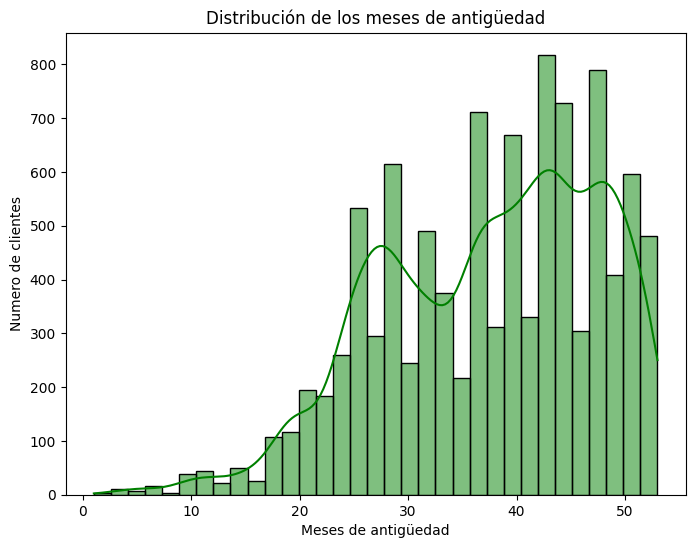

In [22]:
# Grafico meses antiguedad
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='meses_antiguedad', kde=True, color='green', stat='count', palette='Spectral')
plt.title('Distribución de los meses de antigüedad')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()

In [23]:
# Suponiendo que tu columna de meses de antigüedad se llama 'months_antiquity'
df_joined['antiquity_category'] = pd.cut(df_joined['meses_antiguedad'],
                                bins=[0, 24, float('inf')],
                                labels=['Menos de 2 años', 'Más de 2 años'],
                                right=False)

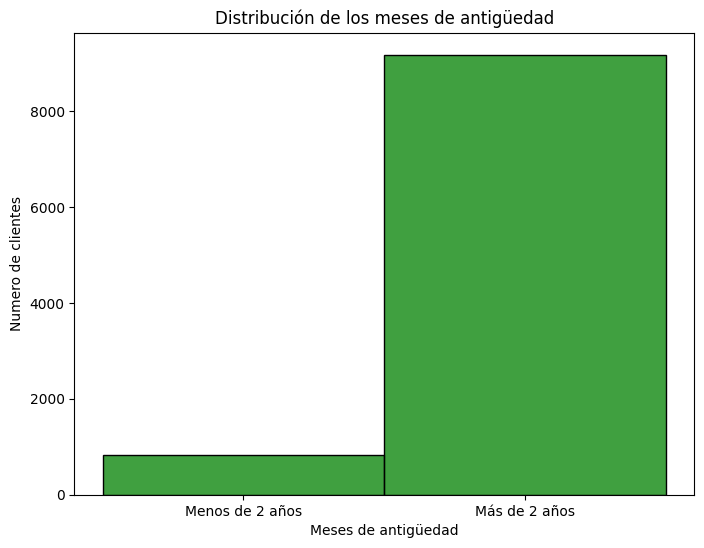

In [24]:
# Grafico meses antiguedad
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='antiquity_category',color='green', stat='count', palette='Spectral')
plt.title('Distribución de los meses de antigüedad')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()

In [25]:
df_joined

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_channel,active_customer,segment,probability,age,meses_antiguedad,antiquity_category
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,KFC,1,02 - PARTICULARES,1.000,55,31,Más de 2 años
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,KFA,1,02 - PARTICULARES,1.000,60,30,Más de 2 años
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,KAT,1,02 - PARTICULARES,1.000,38,36,Más de 2 años
3,1138692,V,5,Adultos,"265,487.490",Madrid,KFC,1,02 - PARTICULARES,1.000,51,35,Más de 2 años
4,1258071,V,5,Adultos,"714,033.300",Madrid,KFA,1,02 - PARTICULARES,1.000,53,20,Menos de 2 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,KHE,1,02 - PARTICULARES,0.701,34,42,Más de 2 años
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,KFC,1,02 - PARTICULARES,0.701,51,21,Menos de 2 años
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,KFC,1,03 - UNIVERSITARIO,0.701,30,31,Más de 2 años
9998,1120992,H,5,Adultos,"143,527.110",Madrid,KAT,0,02 - PARTICULARES,0.701,40,31,Más de 2 años


In [26]:
df_joined.drop('meses_antiguedad', axis=1 , inplace= True)

In [27]:
df_joined.drop('antiquity_category', axis=1 , inplace= True)

Convertimos la columna de meses de antigüedad en tres categorías: menos de un año, entre 1 y 3 años, y más de 3 años, con el objetivo de mejorar la segmentación de los datos.

## Probabilidad de compra

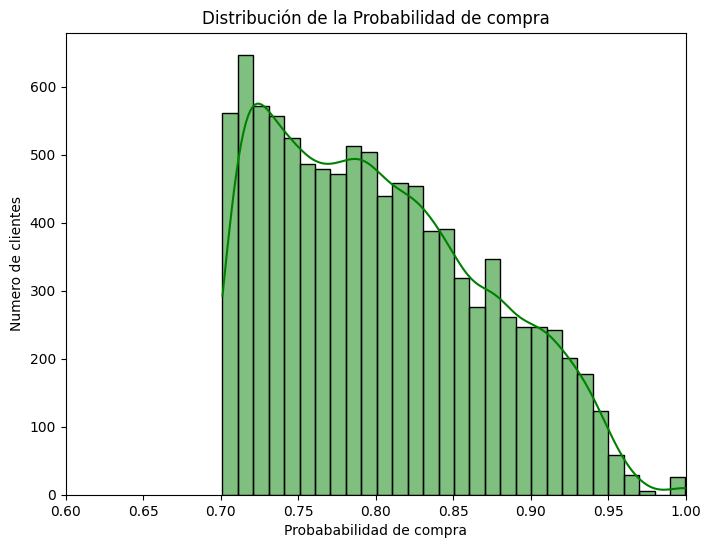

In [28]:
# Supongamos que 'variable_numerica' es el nombre de tu columna numérica que va de 0 a 1
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='probability', bins=30, color = "green" ,kde=True,stat='count', palette='Spectral')
plt.title('Distribución de la Probabilidad de compra')
plt.xlabel('Probababilidad de compra')
plt.ylabel('Numero de clientes')
plt.xlim(0.6, 1)
plt.xticks(rotation=0)
plt.show()

In [29]:
# Crear las categorías para 'probabilidad_compra' utilizando pd.cut
df_joined['categoria_probabilidad'] = pd.cut(df_joined['probability'],
                            bins=[0, 0.80, 0.90, 1.0],
                            labels=['Media', 'Alta', ' Muy Alta'],
                            right=True)


In [30]:
df_joined.drop('probability', axis=1, inplace=True)

Añadir la variable prob_compra a la segmentación tiene sentido porque proporciona una estimación clara de la probabilidad de que un cliente realice una compra. Con valores que van de 0.7 a 1, esta variable nos permite identificar distintos niveles de intención de compra. Al segmentar en función de esta probabilidad, podemos personalizar los mensajes de marketing, enfocándonos en aquellos clientes más propensos a realizar una compra y diferenciando estrategias para aquellos con probabilidades más bajas, lo que optimiza la efectividad de la campaña.

## Edad

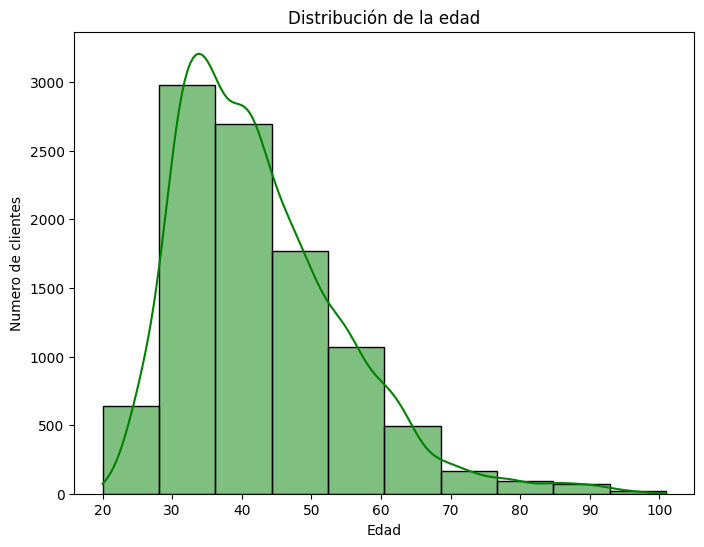

In [31]:
# Grafico edad
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='age', bins=10, kde=True, color='green', stat='count', palette='Spectral')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()

In [33]:
percentile_33 = df_joined['age'].quantile(0.33)
percentile_70 = df_joined['age'].quantile(0.70)

print("Percentile 33:", percentile_33)
print("Percentile 70:", percentile_70)

Percentile 33: 36.0
Percentile 70: 47.0


Convertir la edad numérica en categorías como "Jóvenes", "Adultos" y "Senior" mejora la segmentación al facilitar la identificación de patrones de comportamiento específicos para cada grupo etario. Además, permite diseñar estrategias de marketing personalizadas, simplifica el análisis y reduce el ruido en los datos, haciendo que las decisiones sean más claras y efectivas.

In [32]:
df_joined.drop('grupo_edad', axis=1, inplace=True)

In [33]:


# Categorías para 'age'
df_joined['age_category'] = pd.cut(df_joined['age'],
                            bins=[0, 36,50, float('inf')],
                            labels=['Jovenes/Adultos', 'Adultos', 'Senior'],
                            right=False)

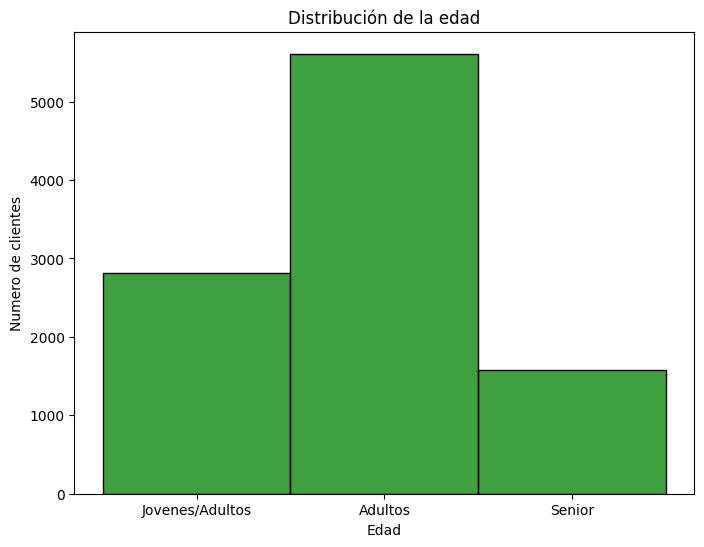

In [34]:
# Grafico edad
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='age_category', color='green', stat='count', palette='Spectral')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()

In [35]:
df_joined.drop('age', axis=1 , inplace= True)

## Median_salary

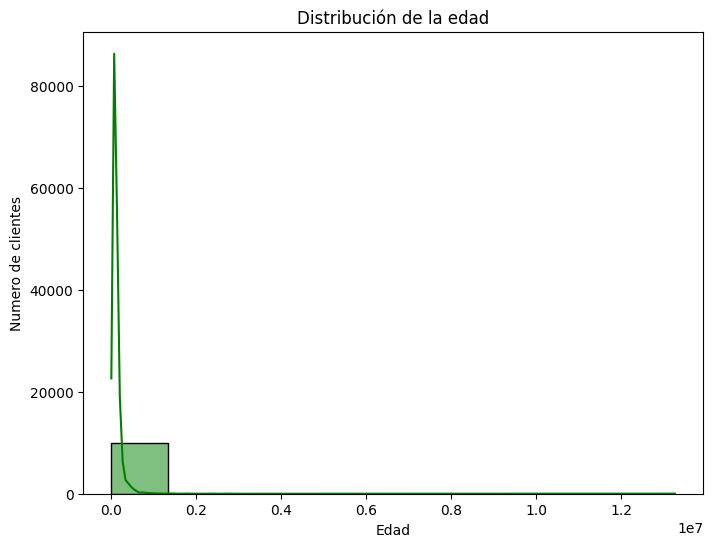

In [36]:
# Grafico edad
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='median_salary', bins=10, kde=True, color='green', stat='count', palette='Spectral')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()

In [37]:
df_joined['median_salary'].describe()

count       10,000.000
mean       131,275.801
std        208,609.944
min         11,161.290
25%         70,479.668
50%         99,930.780
75%        144,895.312
max     13,268,621.280
Name: median_salary, dtype: float64

In [38]:
# Calcular los percentiles 90% y 95%
percentile_80 = df_joined['median_salary'].quantile(0.80)
percentile_90 = df_joined['median_salary'].quantile(0.90)

# Imprimir los resultados
print(f"Percentil 80: {percentile_80}")
print(f"Percentil 90: {percentile_90}")

Percentil 80: 161144.30400000006
Percentil 90: 213372.744


In [39]:
df_joined['salary_segment'] = pd.cut(df_joined['median_salary'],
                            bins=[0, 85000, 130000,  float('inf')],
                            labels=['Salario bajo', 'Salario medio', 'Salario alto'],
                            right=False)

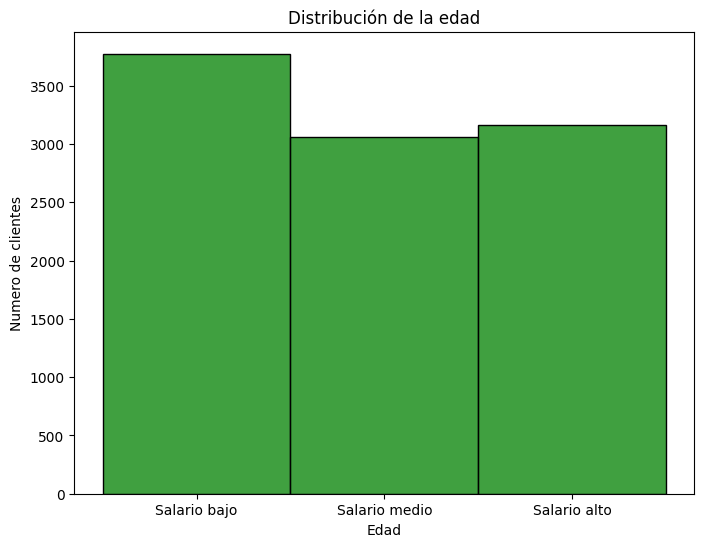

In [40]:
# Grafico edad
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='salary_segment', color='green', stat='count', palette='Spectral')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()

In [41]:
df_joined.drop('median_salary', axis=1 , inplace= True)

In [42]:
df_joined.drop('mes_partition', axis=1 , inplace= True)

In [43]:
df_joined

,pk_cid,gender,region_code,entry_channel,active_customer,segment,categoria_probabilidad,age_category,salary_segment
0,1200307,V,Madrid,KFC,1,02 - PARTICULARES,Muy Alta,Senior,Salario alto
1,330599,H,Madrid,KFA,1,02 - PARTICULARES,Muy Alta,Senior,Salario alto
2,1136531,H,Madrid,KAT,1,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
3,1138692,V,Madrid,KFC,1,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
4,1258071,V,Madrid,KFA,1,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
...,...,...,...,...,...,...,...,...,...
9995,1108774,H,Sevilla,KHE,1,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto
9996,1298291,V,Cádiz,KFC,1,02 - PARTICULARES,Media,Adultos,Salario medio
9997,1209693,H,Asturias,KFC,1,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo
9998,1120992,H,Madrid,KAT,0,02 - PARTICULARES,Media,Adultos,Salario alto


## Numero de productos contratados

In [44]:
'''# Obtener los valores únicos de 'num_products_contracts'

plt.figure(figsize=(8, 6))
sns.countplot(data=df_joined, x='num_products_contracts', palette='Spectral')
plt.title('Distribución de Numero de Productos contratados')
plt.xlabel('Productos contratados')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()'''

"# Obtener los valores únicos de 'num_products_contracts'\n\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df_joined, x='num_products_contracts', palette='Spectral')\nplt.title('Distribución de Numero de Productos contratados')\nplt.xlabel('Productos contratados')\nplt.ylabel('Numero de clientes')\nplt.xticks(rotation=0)\nplt.show()"

In [45]:
'''df_joined['num_products_contracts'].value_counts(normalize = True) * 100'''

"df_joined['num_products_contracts'].value_counts(normalize = True) * 100"


Se añade la variable num_products_contracts a la segmentación debido a su capacidad para proporcionar información valiosa sobre el comportamiento de los clientes. Con una distribución que muestra una variedad de niveles de contratación (desde 0 hasta 9 productos), esta variable permite identificar patrones en la lealtad del cliente y la potencialidad de ventas adicionales. Además, la inclusión de esta variable facilita la personalización de ofertas y la segmentación de clientes en función de su compromiso con la empresa, lo que puede conducir a estrategias de marketing más efectivas y a un aumento en la retención de clientes.

## Gender

In [46]:
df_joined['gender'].value_counts(normalize = True) * 100

gender
V   65.190
H   34.810
Name: proportion, dtype: float64


Se incluye la variable gender en la segmentación debido a su distribución un poco desequilibrada, con un 65.19% de hombres (V) y un 34.81% de mujeres (H). Esta diversidad permite identificar diferencias significativas en el comportamiento y las preferencias de los clientes, lo que es fundamental para personalizar las estrategias de marketing y mejorar la efectividad de las campañas dirigidas a cada género.

## Mes_Partition

Se eliminan las variables mes_partition y mes_nombre_partition debido a su distribución desbalanceada, donde una única categoría (mes 5) .

## Active_customer

In [47]:
df_joined['active_customer'].value_counts(normalize = True) * 100

active_customer
1   97.230
0    2.770
Name: proportion, dtype: float64

Se elimina esta variabel por no proporcionar demasiada informacion.

In [48]:
df_joined.drop('active_customer', axis = 1, inplace=True)

In [49]:
df_joined

,pk_cid,gender,region_code,entry_channel,segment,categoria_probabilidad,age_category,salary_segment
0,1200307,V,Madrid,KFC,02 - PARTICULARES,Muy Alta,Senior,Salario alto
1,330599,H,Madrid,KFA,02 - PARTICULARES,Muy Alta,Senior,Salario alto
2,1136531,H,Madrid,KAT,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
3,1138692,V,Madrid,KFC,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
4,1258071,V,Madrid,KFA,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
...,...,...,...,...,...,...,...,...
9995,1108774,H,Sevilla,KHE,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto
9996,1298291,V,Cádiz,KFC,02 - PARTICULARES,Media,Adultos,Salario medio
9997,1209693,H,Asturias,KFC,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo
9998,1120992,H,Madrid,KAT,02 - PARTICULARES,Media,Adultos,Salario alto


## Segment

In [50]:
df_joined['segment'].value_counts(normalize = True) * 100 

segment
02 - PARTICULARES    74.570
03 - UNIVERSITARIO   15.070
01 - TOP             10.360
Name: proportion, dtype: float64

## Region_code

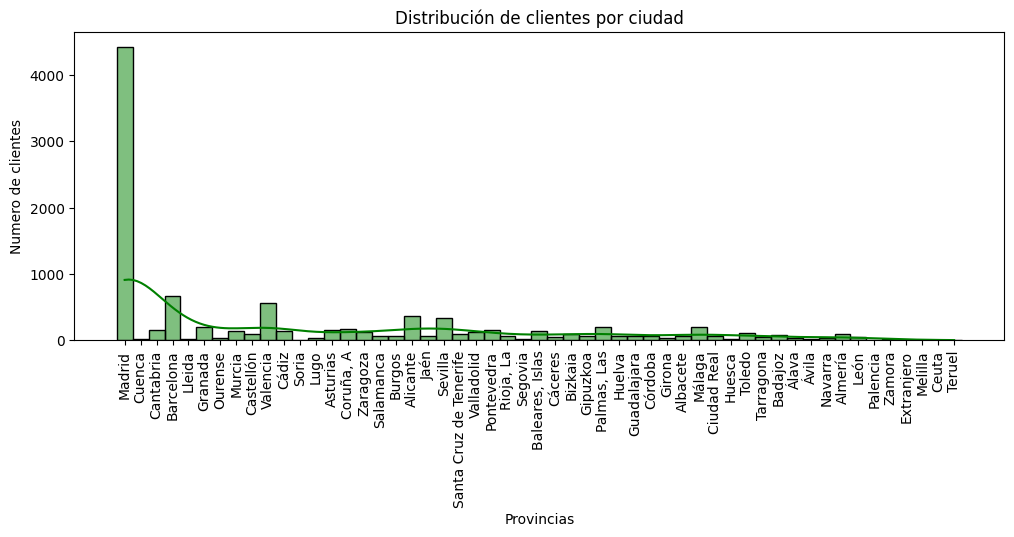

In [51]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df_joined, x='region_code', kde=True, color='green', palette='Spectral')
plt.title('Distribución de clientes por ciudad')
plt.xlabel('Provincias')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=90)
plt.show()

In [52]:
df_joined['region_code'].value_counts(normalize = True) * 100 

region_code
Madrid                   44.170
Barcelona                 6.620
Valencia                  5.610
Alicante                  3.660
Sevilla                   3.320
Málaga                    2.020
Granada                   2.010
Palmas, Las               2.010
Coruña, A                 1.750
Cantabria                 1.580
Pontevedra                1.490
Asturias                  1.490
Murcia                    1.440
Cádiz                     1.430
Baleares, Islas           1.420
Zaragoza                  1.320
Valladolid                1.250
Toledo                    1.170
Castellón                 1.030
Bizkaia                   1.020
Santa Cruz de Tenerife    0.990
Almería                   0.930
Badajoz                   0.750
Burgos                    0.720
Jaén                      0.710
Salamanca                 0.710
Gipuzkoa                  0.640
Guadalajara               0.630
Huelva                    0.620
Ciudad Real               0.610
Córdoba                   0.

Voy a sustituir cada provincia por su número de habitantes para calcular la media de habitantes en cada cluster, lo que me brindará una idea del tamaño de las ciudades de mis clientes. Aunque no podré identificar la región específica de cada segmento, esta información me ayudará a diferenciar entre clientes de ciudades grandes y pequeñas.

Para llevar a cabo este enfoque, recogeré los datos de población del INE del año 2019 y realizaré las sustituciones necesarias.


In [53]:

# Población total de España
poblacion_total = 47026208

# Calcular la media de población por provincia
media_poblacion = poblacion_total / 52

# Diccionario que relaciona las provincias con su población
poblacion_dict = {
    'Madrid': 6663394,
    'Asturias': 1022800,
    'Palmas, Las': 1120406,
    'Barcelona': 5664579,
    'Valencia': 2565124,
    'Coruña, A': 1119596,
    'Sevilla': 1942389,
    'Alicante': 1858683,
    'Zaragoza': 964693,
    'Pontevedra': 942665,
    'Murcia': 1493898,
    'Cádiz': 1240155,
    'Valladolid': 519546,
    'Málaga': 1661785,
    'Salamanca': 330119,
    'Cantabria': 581078,
    'Bizkaia': 1152651,
    'Ávila': 157640,
    'Cáceres': 394151,
    'Toledo': 694844,
    'Burgos': 356958,
    'Albacete': 388167,
    'Baleares, Islas': 1149460,
    'Córdoba': 782979,
    'Granada': 914678,
    'Rioja, La': 316798,
    'Badajoz': 673559,
    'Castellón': 579962,
    'Lugo': 329587,
    'Ciudad Real': 495761,
    'Ourense': 307651,
    'León': 460001,
    'Huelva': 521870,
    'Jaén': 633564,
    'Tarragona': 804664,
    'Santa Cruz de Tenerife': 1032983,
    'Navarra': 654214,
    'Zamora': 172539,
    'Álava': 331549,
    'Almería': 716820,
    'Gipuzkoa': 723576,
    'Palencia': 160980,
    'Guadalajara': 257762,
    'Segovia': 153129,
    'Girona': 771044,
    'Cuenca': 196329,
    'Huesca': 220461,
    'Lleida': 434930,
    'Extranjero': media_poblacion,  # Media de la población para "Extranjero"
    'Soria': 88636,
    'Teruel': 134137,
    'Melilla': 86487,
    'Ceuta': 84777
}

# Reemplazar los nombres de provincias en df_joined por la población correspondiente
df_joined['region_code'] = df_joined['region_code'].replace(poblacion_dict)

# Cambiar el tipo de la columna a int
df_joined['region_code'] = df_joined['region_code'].astype(int)

# Verifica los cambios
df_joined

,pk_cid,gender,region_code,entry_channel,segment,categoria_probabilidad,age_category,salary_segment
0,1200307,V,6663394,KFC,02 - PARTICULARES,Muy Alta,Senior,Salario alto
1,330599,H,6663394,KFA,02 - PARTICULARES,Muy Alta,Senior,Salario alto
2,1136531,H,6663394,KAT,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
3,1138692,V,6663394,KFC,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
4,1258071,V,6663394,KFA,02 - PARTICULARES,Muy Alta,Adultos,Salario alto
...,...,...,...,...,...,...,...,...
9995,1108774,H,1942389,KHE,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto
9996,1298291,V,1240155,KFC,02 - PARTICULARES,Media,Adultos,Salario medio
9997,1209693,H,1022800,KFC,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo
9998,1120992,H,6663394,KAT,02 - PARTICULARES,Media,Adultos,Salario alto


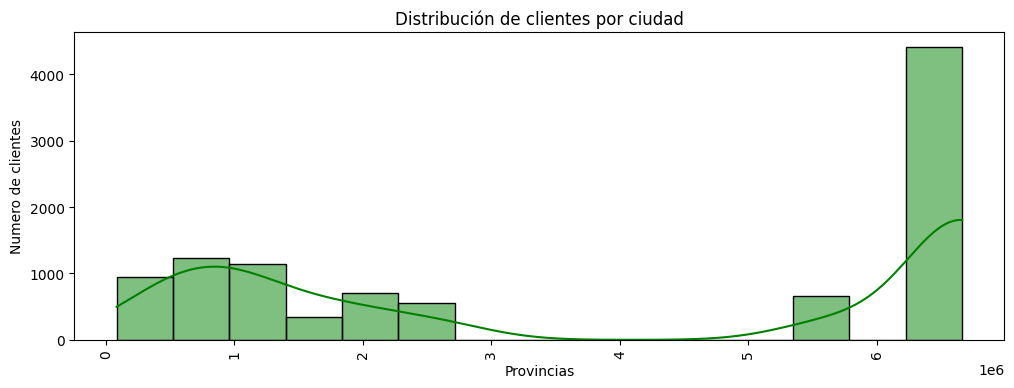

In [54]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df_joined, x='region_code', kde=True, color='green', palette='Spectral')
plt.title('Distribución de clientes por ciudad')
plt.xlabel('Provincias')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=90)
plt.show()

In [55]:
df_joined['region_code'].describe()

count      10,000.000
mean    3,902,064.243
std     2,728,339.859
min        84,777.000
25%     1,032,983.000
50%     5,664,579.000
75%     6,663,394.000
max     6,663,394.000
Name: region_code, dtype: float64

In [56]:
df_joined['city_size'] = pd.cut(df_joined['region_code'],
                        bins=[0,1000000, 3000000, float('inf')],
                        labels=['Ciudad pequeña',"Ciudad Media" ,'Gran ciudad'],
                        right=False)

In [57]:
df_joined

,pk_cid,gender,region_code,entry_channel,segment,categoria_probabilidad,age_category,salary_segment,city_size
0,1200307,V,6663394,KFC,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad
1,330599,H,6663394,KFA,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad
2,1136531,H,6663394,KAT,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
3,1138692,V,6663394,KFC,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
4,1258071,V,6663394,KFA,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
...,...,...,...,...,...,...,...,...,...
9995,1108774,H,1942389,KHE,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto,Ciudad Media
9996,1298291,V,1240155,KFC,02 - PARTICULARES,Media,Adultos,Salario medio,Ciudad Media
9997,1209693,H,1022800,KFC,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo,Ciudad Media
9998,1120992,H,6663394,KAT,02 - PARTICULARES,Media,Adultos,Salario alto,Gran ciudad


In [58]:
df_joined.drop('region_code', axis=1, inplace=True)

La columna entry_channel se eliminará del DataFrame debido a la falta de información sobre su significado y contexto. Sin una comprensión clara de lo que representa, es difícil evaluar su relevancia y utilidad en el análisis

In [59]:
df_joined.drop('entry_channel', axis=1, inplace=True)

In [60]:
df_joined

,pk_cid,gender,segment,categoria_probabilidad,age_category,salary_segment,city_size
0,1200307,V,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad
1,330599,H,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad
2,1136531,H,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
3,1138692,V,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
4,1258071,V,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
...,...,...,...,...,...,...,...
9995,1108774,H,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto,Ciudad Media
9996,1298291,V,02 - PARTICULARES,Media,Adultos,Salario medio,Ciudad Media
9997,1209693,H,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo,Ciudad Media
9998,1120992,H,02 - PARTICULARES,Media,Adultos,Salario alto,Gran ciudad


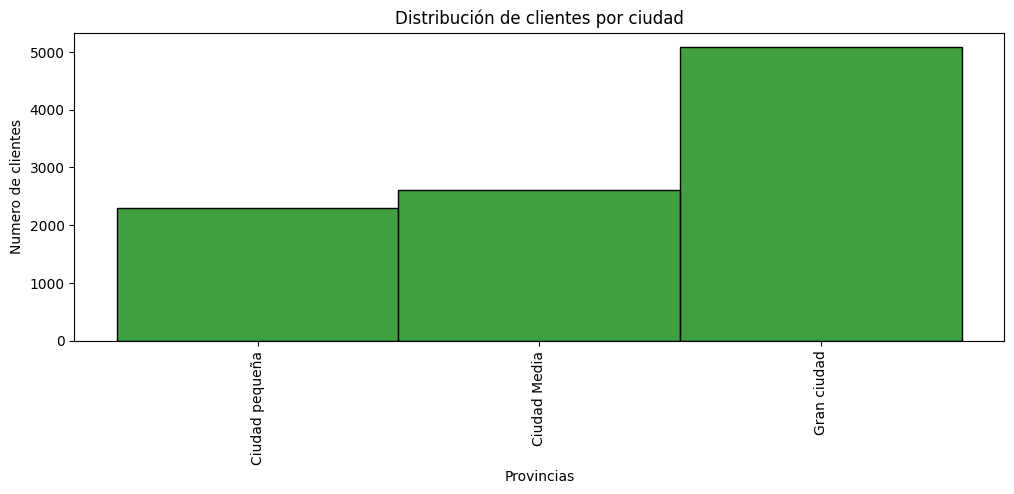

In [61]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df_joined, x='city_size', color='green', palette='Spectral')
plt.title('Distribución de clientes por ciudad')
plt.xlabel('Provincias')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=90)
plt.show()

In [62]:
df_joined

,pk_cid,gender,segment,categoria_probabilidad,age_category,salary_segment,city_size
0,1200307,V,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad
1,330599,H,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad
2,1136531,H,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
3,1138692,V,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
4,1258071,V,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad
...,...,...,...,...,...,...,...
9995,1108774,H,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto,Ciudad Media
9996,1298291,V,02 - PARTICULARES,Media,Adultos,Salario medio,Ciudad Media
9997,1209693,H,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo,Ciudad Media
9998,1120992,H,02 - PARTICULARES,Media,Adultos,Salario alto,Gran ciudad


# Encoding

In [63]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pk_cid                  10000 non-null  int64   
 1   gender                  10000 non-null  object  
 2   segment                 10000 non-null  category
 3   categoria_probabilidad  10000 non-null  category
 4   age_category            10000 non-null  category
 5   salary_segment          10000 non-null  category
 6   city_size               10000 non-null  category
dtypes: category(5), int64(1), object(1)
memory usage: 205.9+ KB


In [64]:
df_joined_1 = df_joined.copy() 

In [65]:
# Cambiar 'gender' a 1 si es 'V' y 0 si es 'H'
df_joined['genero_v'] = df_joined['gender'].map({'V': 1, 'H': 0})

# Eliminar la columna original 'gender'
df_joined.drop(columns=['gender'], inplace=True)

In [66]:
df_joined

,pk_cid,segment,categoria_probabilidad,age_category,salary_segment,city_size,genero_v
0,1200307,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad,1
1,330599,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad,0
2,1136531,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,0
3,1138692,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,1
4,1258071,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,1
...,...,...,...,...,...,...,...
9995,1108774,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto,Ciudad Media,0
9996,1298291,02 - PARTICULARES,Media,Adultos,Salario medio,Ciudad Media,1
9997,1209693,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo,Ciudad Media,0
9998,1120992,02 - PARTICULARES,Media,Adultos,Salario alto,Gran ciudad,0


In [67]:
df_joined.set_index('pk_cid', inplace=True)


In [68]:
df_joined

,segment,categoria_probabilidad,age_category,salary_segment,city_size,genero_v
pk_cid,,,,,,
1200307,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad,1
330599,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad,0
1136531,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,0
1138692,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,1
1258071,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,1
...,...,...,...,...,...,...
1108774,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto,Ciudad Media,0
1298291,02 - PARTICULARES,Media,Adultos,Salario medio,Ciudad Media,1
1209693,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo,Ciudad Media,0


In [69]:
df_joined

,segment,categoria_probabilidad,age_category,salary_segment,city_size,genero_v
pk_cid,,,,,,
1200307,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad,1
330599,02 - PARTICULARES,Muy Alta,Senior,Salario alto,Gran ciudad,0
1136531,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,0
1138692,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,1
1258071,02 - PARTICULARES,Muy Alta,Adultos,Salario alto,Gran ciudad,1
...,...,...,...,...,...,...
1108774,02 - PARTICULARES,Media,Jovenes/Adultos,Salario alto,Ciudad Media,0
1298291,02 - PARTICULARES,Media,Adultos,Salario medio,Ciudad Media,1
1209693,03 - UNIVERSITARIO,Media,Jovenes/Adultos,Salario bajo,Ciudad Media,0


In [70]:
df_joined.drop('segment', axis=1, inplace=True)

In [71]:
df_joined

,categoria_probabilidad,age_category,salary_segment,city_size,genero_v
pk_cid,,,,,
1200307,Muy Alta,Senior,Salario alto,Gran ciudad,1
330599,Muy Alta,Senior,Salario alto,Gran ciudad,0
1136531,Muy Alta,Adultos,Salario alto,Gran ciudad,0
1138692,Muy Alta,Adultos,Salario alto,Gran ciudad,1
1258071,Muy Alta,Adultos,Salario alto,Gran ciudad,1
...,...,...,...,...,...
1108774,Media,Jovenes/Adultos,Salario alto,Ciudad Media,0
1298291,Media,Adultos,Salario medio,Ciudad Media,1
1209693,Media,Jovenes/Adultos,Salario bajo,Ciudad Media,0


In [72]:
# Aplicar get_dummies a las columnas 'recomendacion' y 'segment'
df_joined = pd.get_dummies(df_joined, columns=['categoria_probabilidad','age_category','salary_segment','city_size'], dtype=int)

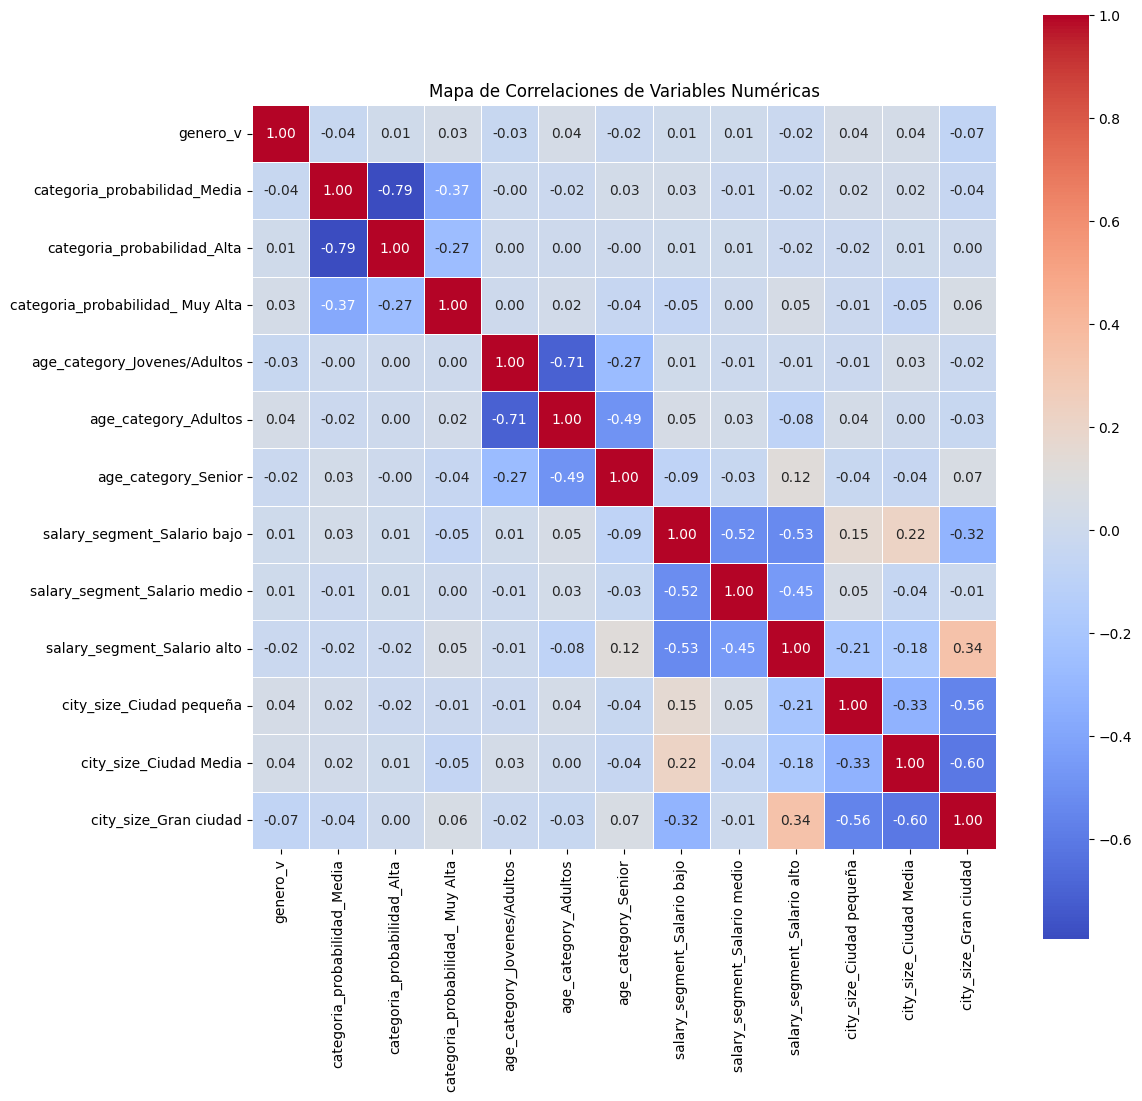

In [73]:
# Calculamos la matriz de correlación
correlation_matrix = df_joined.corr()

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 12))

# Creamos el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)

# Título del gráfico
plt.title('Mapa de Correlaciones de Variables Numéricas')

# Mostramos el gráfico
plt.show()

In [74]:
df_joined

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad
pk_cid,,,,,,,,,,,,,
1200307,1,0,0,1,0,0,1,0,0,1,0,0,1
330599,0,0,0,1,0,0,1,0,0,1,0,0,1
1136531,0,0,0,1,0,1,0,0,0,1,0,0,1
1138692,1,0,0,1,0,1,0,0,0,1,0,0,1
1258071,1,0,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108774,0,1,0,0,1,0,0,0,0,1,0,1,0
1298291,1,1,0,0,0,1,0,0,1,0,0,1,0
1209693,0,1,0,0,1,0,0,1,0,0,0,1,0


In [75]:
'''# Crear el escalador
scaler = RobustScaler()

# Aplicar el escalador a las columnas numéricas
df_joined_scaled = df_joined.copy()
df_joined_scaled[df_joined_scaled.columns] = scaler.fit_transform(df_joined_scaled)

# Mostrar el DataFrame escalado
df_joined_scaled'''

'# Crear el escalador\nscaler = RobustScaler()\n\n# Aplicar el escalador a las columnas numéricas\ndf_joined_scaled = df_joined.copy()\ndf_joined_scaled[df_joined_scaled.columns] = scaler.fit_transform(df_joined_scaled)\n\n# Mostrar el DataFrame escalado\ndf_joined_scaled'

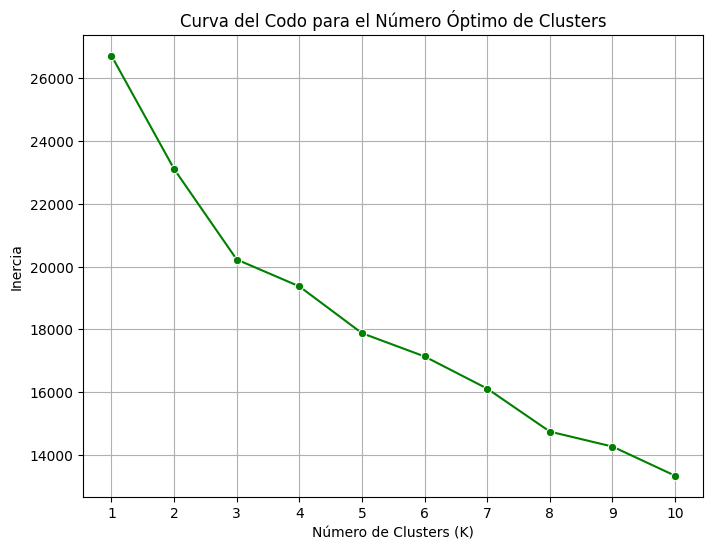

In [76]:
# Definir el rango de clusters a evaluar
range_n_clusters = range(1, 11)
inertia = []

# Calcular la inercia para cada número de clusters
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_joined)
    inertia.append(kmeans.inertia_)

# Dibujar la curva del codo
plt.figure(figsize=(8, 6))
sns.lineplot(x=range_n_clusters, y=inertia, marker='o',color = 'green',palette='Spectral')
plt.title('Curva del Codo para el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

In [77]:
cluster_model_4 = KMeans(n_clusters = 4, random_state=42)
cluster_model_5 = KMeans(n_clusters = 5, random_state=42)
cluster_model_6 = KMeans(n_clusters = 6, random_state=42)


df_joined['cluster_4'] = cluster_model_4.fit_predict(df_joined)
df_joined['cluster_5'] = cluster_model_5.fit_predict(df_joined)
df_joined['cluster_6'] = cluster_model_6.fit_predict(df_joined)


print(df_joined['cluster_4'].value_counts())
print(df_joined['cluster_5'].value_counts())
print(df_joined['cluster_6'].value_counts())


cluster_4
1    2840
0    2528
3    2457
2    2175
Name: count, dtype: int64
cluster_5
1    2840
0    2528
3    1890
2    1513
4    1229
Name: count, dtype: int64
cluster_6
0    2528
3    2157
4    1890
2    1513
1    1229
5     683
Name: count, dtype: int64


In [78]:

df_joined_scaled_4 = df_joined.drop('cluster_5', axis=1)

In [79]:
df_joined_scaled_5 = df_joined.drop('cluster_4', axis=1)

In [80]:
df_joined_scaled_6 = df_joined.drop('cluster_5', axis=1)

In [81]:
df_joined_scaled_4

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_4,cluster_6
pk_cid,,,,,,,,,,,,,,,
1200307,1,0,0,1,0,0,1,0,0,1,0,0,1,1,3
330599,0,0,0,1,0,0,1,0,0,1,0,0,1,1,3
1136531,0,0,0,1,0,1,0,0,0,1,0,0,1,1,5
1138692,1,0,0,1,0,1,0,0,0,1,0,0,1,1,5
1258071,1,0,0,1,0,1,0,0,0,1,0,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108774,0,1,0,0,1,0,0,0,0,1,0,1,0,1,3
1298291,1,1,0,0,0,1,0,0,1,0,0,1,0,3,4
1209693,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0


In [82]:
df_joined_scaled_5

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_5,cluster_6
pk_cid,,,,,,,,,,,,,,,
1200307,1,0,0,1,0,0,1,0,0,1,0,0,1,1,3
330599,0,0,0,1,0,0,1,0,0,1,0,0,1,1,3
1136531,0,0,0,1,0,1,0,0,0,1,0,0,1,1,5
1138692,1,0,0,1,0,1,0,0,0,1,0,0,1,1,5
1258071,1,0,0,1,0,1,0,0,0,1,0,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108774,0,1,0,0,1,0,0,0,0,1,0,1,0,1,3
1298291,1,1,0,0,0,1,0,0,1,0,0,1,0,3,4
1209693,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0


In [83]:
cols = list(df_joined_scaled_5.columns)
cols.remove("cluster_5")
# Calcular las medias para cada cluster
pt = pd.pivot_table(df_joined_scaled_5, index='cluster_5', values=cols, aggfunc='mean')

# Calcular la cantidad de elementos en cada cluster
add = pd.pivot_table(df_joined_scaled_5, index='cluster_5', values='genero_v', aggfunc='count')
pt['count'] = add

# Añadir 'count' a la lista de columnas para la visualización final
cols.append('count')

# Mostrar la tabla con estilos y gradientes de color
pt[cols].style.background_gradient(cmap='coolwarm')

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_6,count
cluster_5,,,,,,,,,,,,,,,
0,0.684731,0.321994,0.555775,0.122231,0.218750,0.697389,0.083861,0.903481,0.058149,0.038370,0.200949,0.670886,0.128165,0.000000,2528
1,0.629225,0.740141,0.164789,0.095070,0.197887,0.603521,0.198592,0.199296,0.000000,0.800704,0.057394,0.086620,0.855986,3.480986,2840
2,0.638467,0.000000,0.813615,0.186385,0.680106,0.000000,0.319894,0.165896,0.368804,0.465301,0.116986,0.163913,0.719101,2.000000,1513
3,0.647090,0.615344,0.268783,0.115873,0.167725,0.744444,0.087831,0.000000,1.000000,0.000000,0.120635,0.225397,0.653968,4.000000,1890
4,0.660700,0.969081,0.000000,0.030919,0.283157,0.590724,0.126119,0.547600,0.379984,0.072417,1.000000,0.000000,0.000000,1.000000,1229


In [84]:
cols = list(df_joined_scaled_4.columns)
cols.remove("cluster_4")
# Calcular las medias para cada cluster
pt = pd.pivot_table(df_joined_scaled_4, index='cluster_4', values=cols, aggfunc='mean')

# Calcular la cantidad de elementos en cada cluster
add = pd.pivot_table(df_joined_scaled_4, index='cluster_4', values='genero_v', aggfunc='count')
pt['count'] = add

# Añadir 'count' a la lista de columnas para la visualización final
cols.append('count')

# Mostrar la tabla con estilos y gradientes de color
pt[cols].style.background_gradient(cmap='coolwarm')

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_6,count
cluster_4,,,,,,,,,,,,,,,
0,0.684731,0.321994,0.555775,0.122231,0.218750,0.697389,0.083861,0.903481,0.058149,0.038370,0.200949,0.670886,0.128165,0.000000,2528
1,0.629225,0.740141,0.164789,0.095070,0.197887,0.603521,0.198592,0.199296,0.000000,0.800704,0.057394,0.086620,0.855986,3.480986,2840
2,0.638621,0.094253,0.724598,0.181149,0.567356,0.208736,0.223908,0.115402,0.560920,0.323678,0.081379,0.115402,0.803218,2.608736,2175
3,0.656085,0.874644,0.066341,0.059015,0.187220,0.683354,0.129426,0.273911,0.689866,0.036223,0.593000,0.172161,0.234839,2.499389,2457


In [85]:
df_joined_scaled_6

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_4,cluster_6
pk_cid,,,,,,,,,,,,,,,
1200307,1,0,0,1,0,0,1,0,0,1,0,0,1,1,3
330599,0,0,0,1,0,0,1,0,0,1,0,0,1,1,3
1136531,0,0,0,1,0,1,0,0,0,1,0,0,1,1,5
1138692,1,0,0,1,0,1,0,0,0,1,0,0,1,1,5
1258071,1,0,0,1,0,1,0,0,0,1,0,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108774,0,1,0,0,1,0,0,0,0,1,0,1,0,1,3
1298291,1,1,0,0,0,1,0,0,1,0,0,1,0,3,4
1209693,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0


In [86]:
cols = list(df_joined_scaled_6.columns)
cols.remove("cluster_6")
# Calcular las medias para cada cluster
pt = pd.pivot_table(df_joined_scaled_6, index='cluster_6', values=cols, aggfunc='mean')

# Calcular la cantidad de elementos en cada cluster
add = pd.pivot_table(df_joined_scaled_6, index='cluster_6', values='genero_v', aggfunc='count')
pt['count'] = add

# Añadir 'count' a la lista de columnas para la visualización final
cols.append('count')

# Mostrar la tabla con estilos y gradientes de color
pt[cols].style.background_gradient(cmap='coolwarm')

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_4,count
cluster_6,,,,,,,,,,,,,,,
0,0.684731,0.321994,0.555775,0.122231,0.218750,0.697389,0.083861,0.903481,0.058149,0.038370,0.200949,0.670886,0.128165,0.000000,2528
1,0.660700,0.969081,0.000000,0.030919,0.283157,0.590724,0.126119,0.547600,0.379984,0.072417,1.000000,0.000000,0.000000,3.000000,1229
2,0.638467,0.000000,0.813615,0.186385,0.680106,0.000000,0.319894,0.165896,0.368804,0.465301,0.116986,0.163913,0.719101,2.000000,1513
3,0.633287,0.974502,0.000000,0.025498,0.260547,0.480297,0.259156,0.262401,0.000000,0.737599,0.033843,0.112656,0.853500,1.000000,2157
4,0.647090,0.615344,0.268783,0.115873,0.167725,0.744444,0.087831,0.000000,1.000000,0.000000,0.120635,0.225397,0.653968,2.649735,1890
5,0.616398,0.000000,0.685212,0.314788,0.000000,0.992679,0.007321,0.000000,0.000000,1.000000,0.131772,0.004392,0.863836,1.000000,683


In [87]:
df_joined_scaled_5

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_5,cluster_6
pk_cid,,,,,,,,,,,,,,,
1200307,1,0,0,1,0,0,1,0,0,1,0,0,1,1,3
330599,0,0,0,1,0,0,1,0,0,1,0,0,1,1,3
1136531,0,0,0,1,0,1,0,0,0,1,0,0,1,1,5
1138692,1,0,0,1,0,1,0,0,0,1,0,0,1,1,5
1258071,1,0,0,1,0,1,0,0,0,1,0,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108774,0,1,0,0,1,0,0,0,0,1,0,1,0,1,3
1298291,1,1,0,0,0,1,0,0,1,0,0,1,0,3,4
1209693,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0


In [88]:
# Guardar la columna de clusters
clusters_5 = df_joined_scaled_5['cluster_5']

# Eliminar el resto de las columnas escaladas
df_joined_scaled_5.drop(columns=df_joined_scaled_5.columns, inplace=True)

# Revertir a los datos originales (sin escalar), salvo por la columna de clusters
df_joined_scaled_5 = df_joined.copy()

# Añadir la columna de clusters al DataFrame original
df_joined_scaled_5['cluster_5'] = clusters_5

In [89]:
df_joined_scaled_5

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_4,cluster_5,cluster_6
pk_cid,,,,,,,,,,,,,,,,
1200307,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,3
330599,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,3
1136531,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,5
1138692,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,5
1258071,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108774,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,3
1298291,1,1,0,0,0,1,0,0,1,0,0,1,0,3,3,4
1209693,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


ValueError: Invalid color S

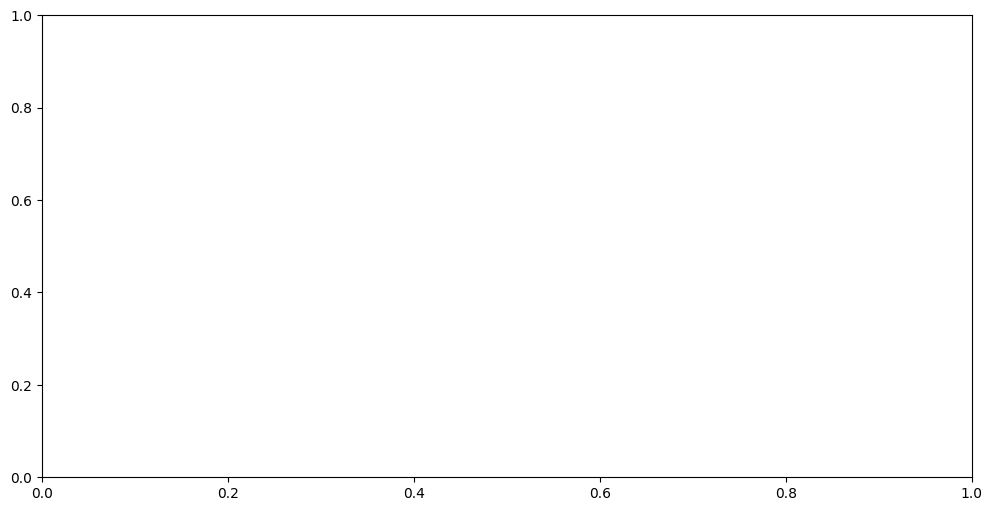

In [97]:
# Agrupar por clúster y calcular la media de cada variable
df_grouped = df_joined_scaled_5.groupby('cluster_5').mean()  # Promedio de las características por grupo

# Gráfico de barras apiladas
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color= 'Spectral')
plt.title('Distribución de características por clúster')
plt.xlabel('Clúster')
plt.ylabel('Proporción')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [90]:
# Calcular las medias de todas las columnas agrupadas por el cluster
cluster_means = df_joined_scaled_5.groupby('cluster_5').mean()

# Mostrar las medias
cluster_means

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_4,cluster_6
cluster_5,,,,,,,,,,,,,,,
0,0.685,0.322,0.556,0.122,0.219,0.697,0.084,0.903,0.058,0.038,0.201,0.671,0.128,0.000,0.000
1,0.629,0.740,0.165,0.095,0.198,0.604,0.199,0.199,0.000,0.801,0.057,0.087,0.856,1.000,3.481
2,0.638,0.000,0.814,0.186,0.680,0.000,0.320,0.166,0.369,0.465,0.117,0.164,0.719,2.000,2.000
3,0.647,0.615,0.269,0.116,0.168,0.744,0.088,0.000,1.000,0.000,0.121,0.225,0.654,2.650,4.000
4,0.661,0.969,0.000,0.031,0.283,0.591,0.126,0.548,0.380,0.072,1.000,0.000,0.000,3.000,1.000


In [91]:
# Guardar la columna de clusters
clusters_4 = df_joined_scaled_4['cluster_4']

# Eliminar el resto de las columnas escaladas
df_joined_scaled_4.drop(columns=df_joined_scaled_4.columns, inplace=True)

# Revertir a los datos originales (sin escalar), salvo por la columna de clusters
df_joined_scaled_4 = df_joined.copy()

# Añadir la columna de clusters al DataFrame original
df_joined_scaled_4['cluster_4'] = clusters_4

In [92]:
# Calcular las medias de todas las columnas agrupadas por el cluster
cluster_means = df_joined_scaled_4.groupby('cluster_4').mean()

# Mostrar las medias
cluster_means

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_5,cluster_6
cluster_4,,,,,,,,,,,,,,,
0,0.685,0.322,0.556,0.122,0.219,0.697,0.084,0.903,0.058,0.038,0.201,0.671,0.128,0.000,0.000
1,0.629,0.740,0.165,0.095,0.198,0.604,0.199,0.199,0.000,0.801,0.057,0.087,0.856,1.000,3.481
2,0.639,0.094,0.725,0.181,0.567,0.209,0.224,0.115,0.561,0.324,0.081,0.115,0.803,2.304,2.609
3,0.656,0.875,0.066,0.059,0.187,0.683,0.129,0.274,0.690,0.036,0.593,0.172,0.235,3.500,2.499


In [93]:
# Guardar la columna de clusters
clusters_6 = df_joined_scaled_6['cluster_6']

# Eliminar el resto de las columnas escaladas
df_joined_scaled_6.drop(columns=df_joined_scaled_6.columns, inplace=True)

# Revertir a los datos originales (sin escalar), salvo por la columna de clusters
df_joined_scaled_6 = df_joined.copy()

# Añadir la columna de clusters al DataFrame original
df_joined_scaled_6['cluster_6'] = clusters_6

In [94]:
# Calcular las medias de todas las columnas agrupadas por el cluster
cluster_means = df_joined_scaled_6.groupby('cluster_6').mean()

# Mostrar las medias
cluster_means

,genero_v,categoria_probabilidad_Media,categoria_probabilidad_Alta,categoria_probabilidad_ Muy Alta,age_category_Jovenes/Adultos,age_category_Adultos,age_category_Senior,salary_segment_Salario bajo,salary_segment_Salario medio,salary_segment_Salario alto,city_size_Ciudad pequeña,city_size_Ciudad Media,city_size_Gran ciudad,cluster_4,cluster_5
cluster_6,,,,,,,,,,,,,,,
0,0.685,0.322,0.556,0.122,0.219,0.697,0.084,0.903,0.058,0.038,0.201,0.671,0.128,0.000,0.000
1,0.661,0.969,0.000,0.031,0.283,0.591,0.126,0.548,0.380,0.072,1.000,0.000,0.000,3.000,4.000
2,0.638,0.000,0.814,0.186,0.680,0.000,0.320,0.166,0.369,0.465,0.117,0.164,0.719,2.000,2.000
3,0.633,0.975,0.000,0.025,0.261,0.480,0.259,0.262,0.000,0.738,0.034,0.113,0.854,1.000,1.000
4,0.647,0.615,0.269,0.116,0.168,0.744,0.088,0.000,1.000,0.000,0.121,0.225,0.654,2.650,3.000
5,0.616,0.000,0.685,0.315,0.000,0.993,0.007,0.000,0.000,1.000,0.132,0.004,0.864,1.000,1.000


# Segmentos de Clientes y Estrategias de Marketing

## 1. Ahorristas de Ciudad Media
**Características:**
- **Género:** 68.5% masculino.
- **Probabilidad de compra:** Media (32.2%).
- **Edad:** Principalmente adultos (69.7% adultos).
- **Salario:** Principalmente bajo (90.3%).
- **Ubicación:** Mayormente en ciudades medianas (67.1%).

**Idea para el Email:**
- **Asunto:** “¡Maximiza tus ahorros con nuestra tarjeta de crédito!”
- **Cuerpo:** Resaltar cómo la tarjeta de crédito ofrece recompensas en compras cotidianas y la posibilidad de acumular ahorros. Proporcionar ejemplos de cómo ahorrar en gastos esenciales puede llevar a grandes beneficios.
- **Descripción de la imagen:** Una imagen de un hombre o una mujer (adulto joven) mirando con satisfacción su aplicación de finanzas personales en un smartphone, rodeado de elementos que simbolizan ahorro (como una alcancía o cupones).

---

## 2. Inversores de Grandes Ciudades
**Características:**
- **Género:** 62.9% masculino.
- **Probabilidad de compra:** Alta (74.0%).
- **Edad:** En su mayoría adultos (60.4% adultos).
- **Salario:** Mayormente alto (80.1%).
- **Ubicación:** Predominantemente en grandes ciudades (85.6%).

**Idea para el Email:**
- **Asunto:** “¡Impulsa tu inversión con nuestra tarjeta premium!”
- **Cuerpo:** Enfatizar los beneficios de la tarjeta, como cashback en inversiones, acceso a productos financieros exclusivos, y cómo puede ayudarles a alcanzar sus objetivos financieros.
- **Descripción de la imagen:** Una imagen que muestre a un adulto usando su tarjeta de crédito en un entorno moderno de oficina, con gráficos financieros en segundo plano y una expresión de confianza en su rostro.

---

## 3. Viajeros Jóvenes de Ciudades Grandes
**Características:**
- **Género:** 63.8% masculino.
- **Probabilidad de compra:** Muy alta (81.4%).
- **Edad:** Jóvenes (68.0% jóvenes).
- **Salario:** Salario medio (36.9%).
- **Ubicación:** Con una buena mezcla en grandes ciudades (71.9%).

**Idea para el Email:**
- **Asunto:** “¡Viaja más y gasta menos con nuestra tarjeta de crédito!”
- **Cuerpo:** Mostrar cómo la tarjeta de crédito ofrece puntos o recompensas en viajes y descuentos en hoteles, y cómo puede hacer que sus experiencias de viaje sean más accesibles.
- **Descripción de la imagen:** Una imagen de un grupo de amigos disfrutando de un viaje, usando su tarjeta de crédito en un restaurante exótico, con una vista espectacular de fondo.

---

## 4. Profesionales de Ciudades Medias
**Características:**
- **Género:** 64.7% masculino.
- **Probabilidad de compra:** Media (61.5%).
- **Edad:** Principalmente adultos (74.4% adultos).
- **Salario:** Principalmente medio (100%).
- **Ubicación:** Principalmente en ciudades medianas (22.5%).

**Idea para el Email:**
- **Asunto:** “¡Tu confianza merece una tarjeta que te respalde!”
- **Cuerpo:** Resaltar la seguridad y confiabilidad de la tarjeta, sus beneficios en emergencias y su capacidad para ayudarles a manejar sus finanzas de manera efectiva.
- **Descripción de la imagen:** Una imagen que muestre a un profesional revisando sus finanzas en un entorno de trabajo, con un enfoque en su tarjeta de crédito en la mesa, simbolizando la confianza y la seguridad.

---

## 5. Compradores Urbanos Diversos
**Características:**
- **Género:** 66.1% masculino.
- **Probabilidad de compra:** Alta (96.9%).
- **Edad:** Mezcla de adultos y seniors (59.1% adultos, 12.6% seniors).
- **Salario:** Principalmente bajo (54.8%).
- **Ubicación:** Ubicados en grandes ciudades (100%).

**Idea para el Email:**
- **Asunto:** “¡Revoluciona tu forma de comprar con nuestra tarjeta de crédito!”
- **Cuerpo:** Resaltar los descuentos y ofertas exclusivas que pueden obtener al utilizar la tarjeta en compras diarias, así como la facilidad de pago.
- **Descripción de la imagen:** Una imagen vibrante de una mujer joven y un hombre mayor en un centro comercial, ambos felices mientras utilizan su tarjeta de crédito en la caja, mostrando la satisfacción de comprar.
